In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import copy

In [75]:
data = pd.read_csv('customer_data.csv')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        400 non-null    int64
 1   salary     400 non-null    int64
 2   purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [77]:
data.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


In [78]:
data = data.sample(frac=1)

In [79]:
data.head()

,age,salary,purchased
256,21,16000,0
282,19,70000,0
280,49,39000,1
60,35,61000,0
25,35,59000,0


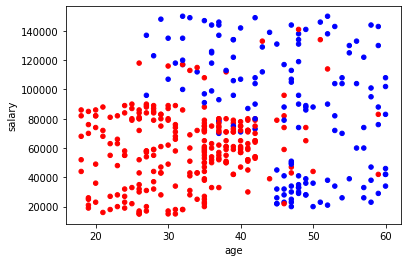

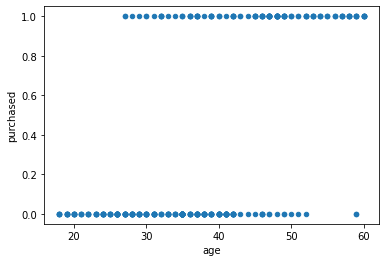

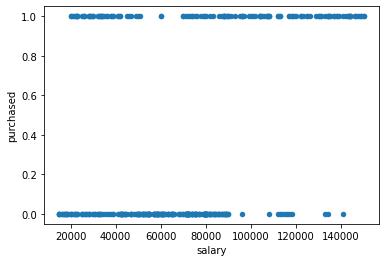

In [80]:
getColor = lambda x: 'red' if x == 0 else 'blue'
color = list(map(getColor, data['purchased']))

data.plot(kind='scatter', x='age', y='salary', c=color)
plot.show()

data.plot(kind='scatter', x='age', y='purchased')
plot.show()

data.plot(kind='scatter', x='salary', y='purchased')
plot.show()

In [81]:
x = data.drop(columns = ['purchased']).to_numpy().reshape((-1,2))
y = data['purchased'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)

'''x_train = x[0:320]
y_train = y[0:320]
x_test = x[320:]
y_test = y[320:]'''

'x_train = x[0:320]\ny_train = y[0:320]\nx_test = x[320:]\ny_test = y[320:]'

In [82]:
x_train.shape

(300, 2)

In [83]:
x_test.shape

(100, 2)

In [84]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [85]:
mu     = np.mean(x_train,axis=0)   
sigma  = np.std(x_train,axis=0) 
X_mean = (x_train - mu)
x_norm = (x_train - mu)/sigma  
x_train = x_norm

In [86]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [87]:
sigmoid(0)

0.5

In [88]:
def compute_cost(X, y, w, b, lambda_= 1): # why lambda_ arg??
    m, n = X.shape
    cost = 0.0
    
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1-y[i])*np.log(1-f_wb) # we may get nan beacuase of log(1-1) = inf so we will normalize data first
    total_cost = cost/m
    return total_cost

In [89]:
m, n = x_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [90]:
w = np.array([0.2, 0.2])
b = 0.5


cost = compute_cost(x_train , y_train, w, b)

print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.733


In [91]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw

In [92]:
'''def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # number of training examples
    m = len(X)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.apend(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing'''

'def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): \n    # number of training examples\n    m = len(X)\n    # An array to store cost J and w\'s at each iteration primarily for graphing later\n    J_history = []\n    w_history = []\n    for i in range(num_iters):\n\n        # Calculate the gradient and update the parameters\n        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   \n\n        # Update Parameters using w, b, alpha and gradient\n        w_in = w_in - alpha * dj_dw               \n        b_in = b_in - alpha * dj_db              \n       \n        # Save cost J at each iteration\n        if i<100000:      # prevent resource exhaustion \n            cost =  cost_function(X, y, w_in, b_in, lambda_)\n            J_history.append(cost)\n\n        # Print cost every at intervals 10 times or as many iterations if < 10\n        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):\n            w_history.apend(w_i

In [93]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000
lambda_ = 1

w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6799355906621887   
Iteration 1000: Cost 0.365003229462149   
Iteration 2000: Cost 0.3649774985847046   
Iteration 3000: Cost 0.3649774623627533   
Iteration 4000: Cost 0.36497746230959566   


In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.01
iters = 10000
lambda_ = 1

w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

In [ ]:
fig, ax1 = plot.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history)
plot.show()

In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.001
iters = 10000


w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.0001
iters = 10000


w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

In [ ]:

def predict(X, w, b): 
   
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        '''for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0'''
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [ ]:

def accurecy(yPred, yTrue):
  return 1- np.sum(np.abs(yPred-yTrue))/len(yPred)

In [ ]:
yPred = predict(x_test, w_out, b_out)
acc = accurecy(yPred, y_test)
print(f"accurecy= {acc}")


In [ ]:
yPred = predict(x_train, w_out, b_out)
acc = accurecy(yPred, y_train)
print(f"accurecy= {acc}")
